In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabaz_score

%matplotlib inline

In [58]:
df = pd.read_csv("./Dataset/snsdata.csv")

In [59]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [60]:
df.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [61]:
df.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [63]:
df['age'].tail(20)

29980       NaN
29981    15.674
29982    16.227
29983    16.835
29984    15.644
29985    16.249
29986    16.214
29987    16.400
29988    16.230
29989       NaN
29990    15.699
29991       NaN
29992       NaN
29993       NaN
29994    15.195
29995    16.115
29996    15.792
29997    15.784
29998    16.378
29999    18.724
Name: age, dtype: float64

In [48]:
# age of teenagers should be between 13 and 20

In [64]:
df['age'] = df['age'].apply(lambda x:(x>=13 and x<20))

In [50]:
df['age'].head()

0    True
1    True
2    True
3    True
4    True
Name: age, dtype: bool

In [65]:
df['age'] = df['age'].fillna(df['age'].mean())

In [66]:
df.isnull().sum()

gradyear           0
gender          2724
age                0
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [67]:
df['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [68]:
df = df.dropna()

In [69]:
df.isnull().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

In [71]:
## label Encoding
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
df['gender']= le.fit_transform(df['gender'])

In [72]:
scalar = StandardScaler()
scaled_features = scalar.fit_transform(df)
np.round(pd.DataFrame(scaled_features).describe())

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,...,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0
mean,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-0.0,-3.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
25%,-0.0,-0.0,0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
50%,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
75%,1.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
max,1.0,2.0,0.0,22.0,29.0,20.0,29.0,22.0,21.0,59.0,...,161.0,17.0,15.0,16.0,26.0,28.0,36.0,31.0,20.0,45.0


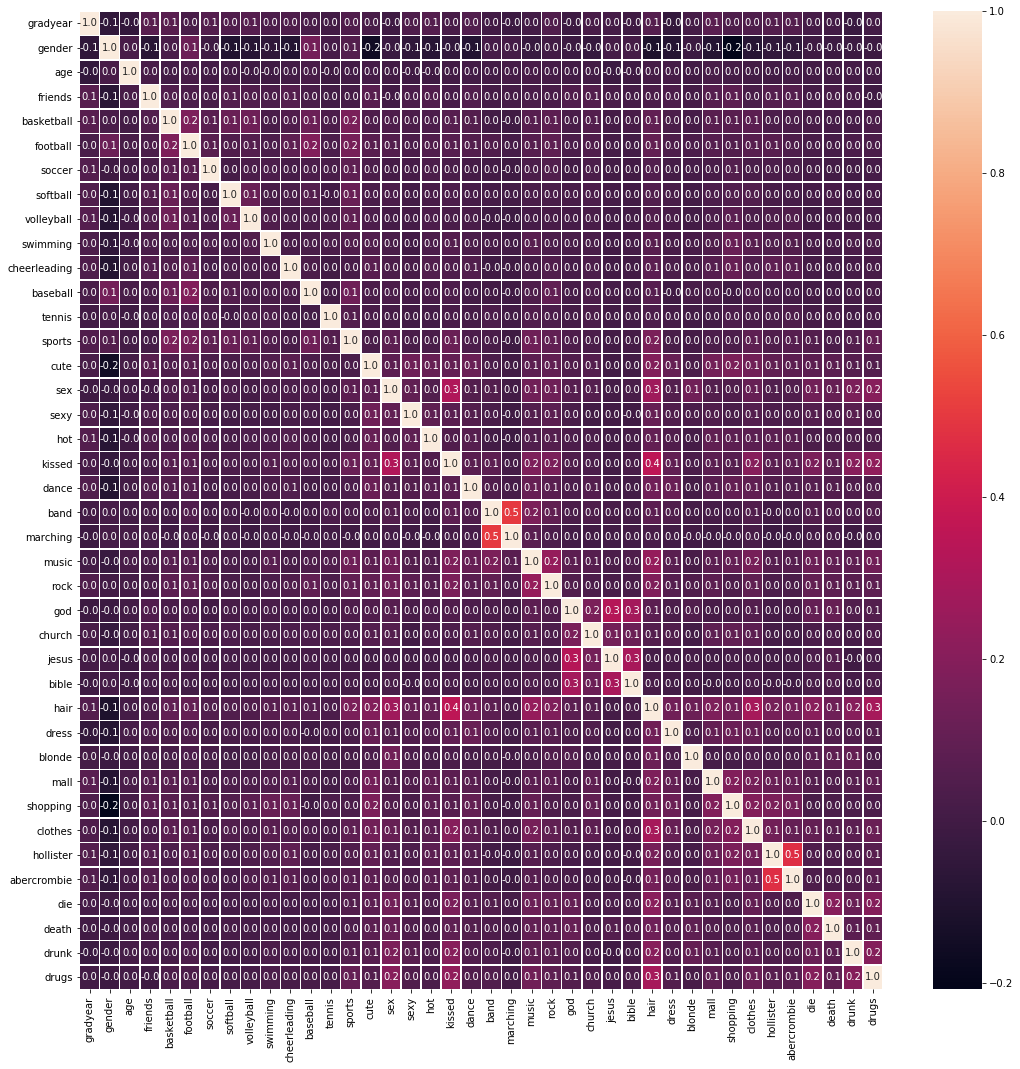

In [73]:
#plt.figure(figsize=(12,10))
#plt_data = df
#sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True) 

#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### We'll start our cluster analysis by considering only the 36 features that represent the number of times various interests appeared on the SNS profiles of teens.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27276 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   gradyear      27276 non-null  int64
 1   gender        27276 non-null  int32
 2   age           27276 non-null  bool 
 3   friends       27276 non-null  int64
 4   basketball    27276 non-null  int64
 5   football      27276 non-null  int64
 6   soccer        27276 non-null  int64
 7   softball      27276 non-null  int64
 8   volleyball    27276 non-null  int64
 9   swimming      27276 non-null  int64
 10  cheerleading  27276 non-null  int64
 11  baseball      27276 non-null  int64
 12  tennis        27276 non-null  int64
 13  sports        27276 non-null  int64
 14  cute          27276 non-null  int64
 15  sex           27276 non-null  int64
 16  sexy          27276 non-null  int64
 17  hot           27276 non-null  int64
 18  kissed        27276 non-null  int64
 19  dance         27276 non-n

In [82]:
df.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [87]:
features = df.iloc[:, 5:40]

In [88]:
features

,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
#  scale the features using standar
scalar = StandardScaler()
features_scale = scalar.fit_transform(features)
np.round(pd.DataFrame(features_scale).describe())

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
count,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,...,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0,27276.0
mean,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
25%,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
50%,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
75%,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
max,20.0,29.0,22.0,21.0,59.0,17.0,30.0,29.0,25.0,22.0,...,161.0,17.0,15.0,16.0,26.0,28.0,36.0,31.0,20.0,45.0


 ## K-means model

In [90]:
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,random_state=1)
    kmeans.fit(features_scale)
    sse[k] = kmeans.inertia_

In [91]:
sse

{1: 954660.0,
 2: 904654.8135154553,
 3: 877958.7040497186,
 4: 854424.3665431115,
 5: 831745.3936254488,
 6: 812558.1777301223,
 7: 792137.4884560738,
 8: 769012.870299907,
 9: 753776.9586748889,
 10: 738191.4909362451}

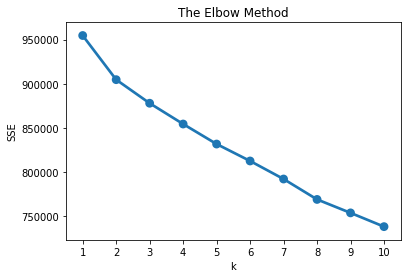

In [92]:
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [93]:
kmeans = KMeans(n_clusters = 5,random_state=1)
kmeans.fit(features_scale)
labels = kmeans.predict(features_scale)

In [94]:
labels

array([0, 4, 0, ..., 0, 0, 0])

In [95]:
df["Cluster_labels"] = labels

In [96]:
df.head(10)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,Cluster_labels
0,2006,1,True,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,0,True,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4
2,2006,1,True,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2006,0,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2006,0,False,142,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6,2006,0,True,72,0,0,0,0,0,0,...,2,0,0,2,0,0,0,0,0,3
7,2006,1,True,17,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2006,0,True,52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2006,0,True,39,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4
10,2006,0,True,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df.Cluster_labels.value_counts()

0    19207
4     5533
2      975
3      810
1      751
Name: Cluster_labels, dtype: int64

In [98]:
df.groupby("Cluster_labels")[df.columns].mean()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,Cluster_labels
Cluster_labels,,,,,,,,,,,,,,,,,,,,,
0,2007.450877,0.226844,0.859426,28.121466,0.200396,0.158744,0.149633,0.085958,0.073983,0.080960,...,0.124121,0.183110,0.057375,0.015411,0.010361,0.119644,0.080231,0.054668,0.021346,0.0
1,2007.360852,0.223702,0.897470,32.463382,0.194407,0.288948,0.162450,0.154461,0.095872,0.161119,...,0.183755,0.296937,0.143808,0.011984,0.010652,0.169108,0.123835,0.053262,0.033289,1.0
2,2007.586667,0.150769,0.880000,30.822564,0.537436,0.505641,0.347692,0.304615,0.213333,0.270769,...,0.662564,0.533333,0.716923,0.118974,0.113846,1.241026,0.532308,0.849231,1.020513,2.0
3,2007.830864,0.092593,0.879012,41.922222,0.397531,0.437037,0.335802,0.207407,0.275309,0.260494,...,0.712346,0.934568,0.420988,1.502469,1.164198,0.228395,0.164198,0.103704,0.077778,3.0
4,2007.651365,0.085849,0.876740,37.170251,0.489427,0.551961,0.468643,0.426351,0.378457,0.289355,...,0.612326,0.882162,0.343033,0.051509,0.029821,0.229532,0.171516,0.084764,0.041569,4.0


For n_clusters = 2 The average silhouette_score is : 0.4248201373234378
For n_clusters = 3 The average silhouette_score is : 0.32659599652069754
For n_clusters = 4 The average silhouette_score is : 0.3207992139026809
For n_clusters = 5 The average silhouette_score is : 0.3115360253203366
For n_clusters = 6 The average silhouette_score is : 0.2916784724668728
For n_clusters = 7 The average silhouette_score is : 0.20195067274908488
For n_clusters = 8 The average silhouette_score is : 0.27088018596387464
For n_clusters = 9 The average silhouette_score is : 0.2665726201724977


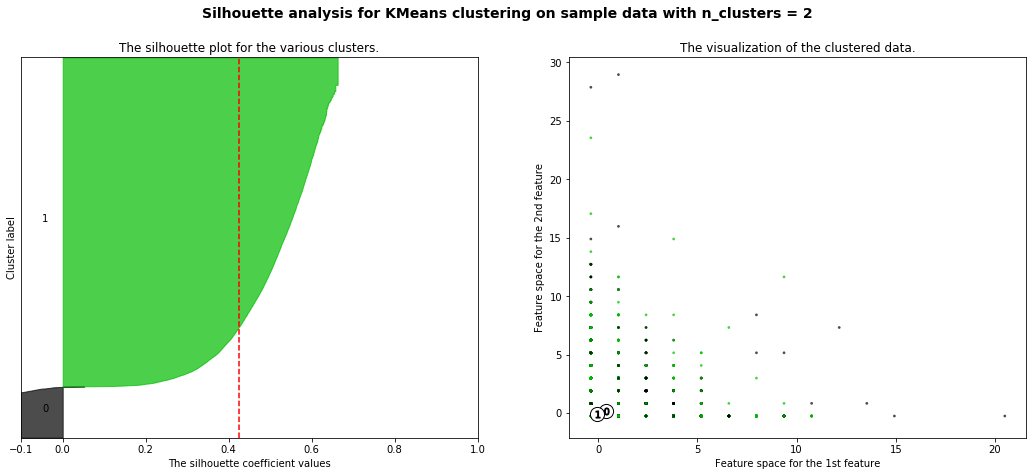

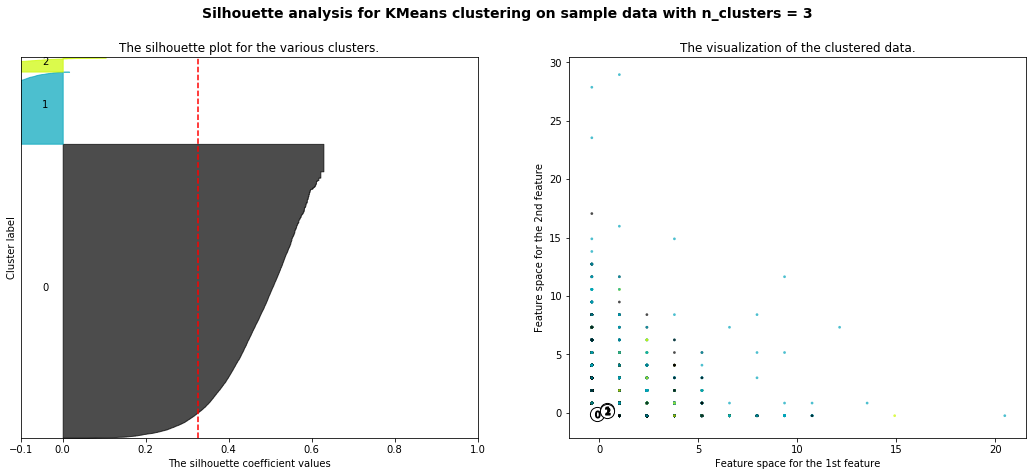

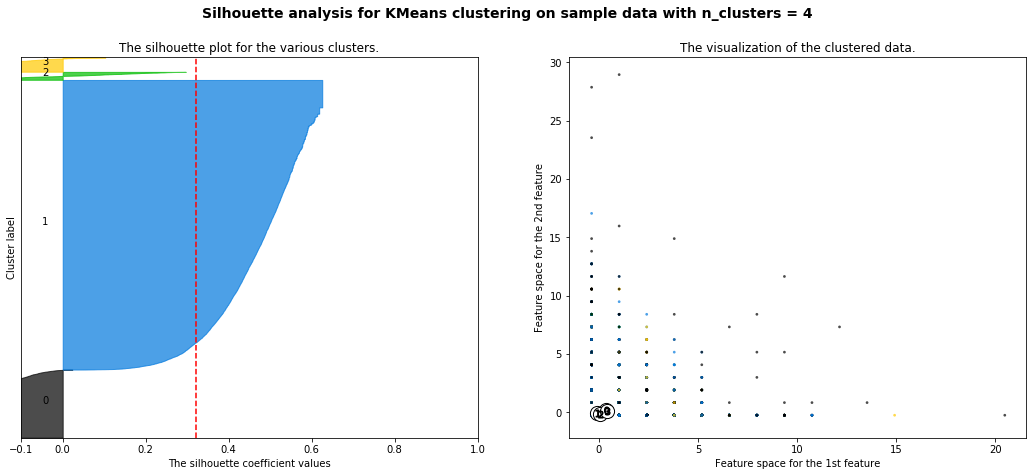

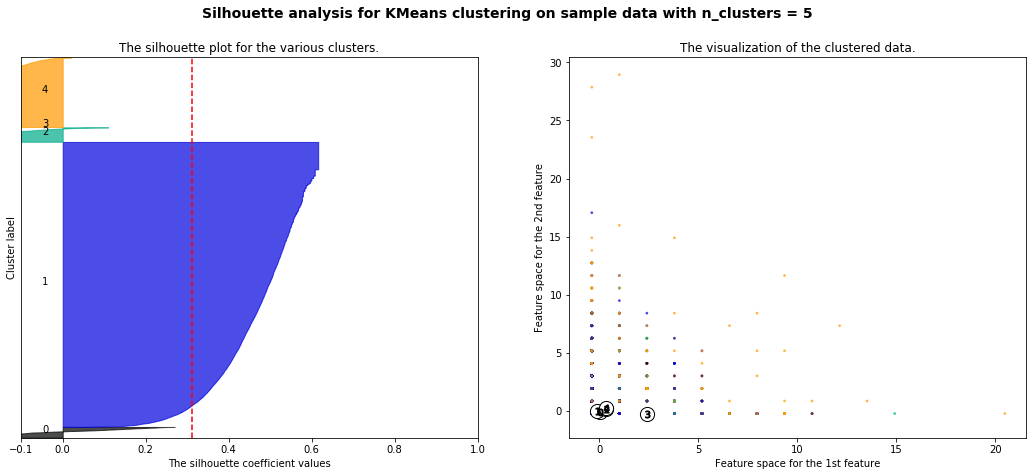

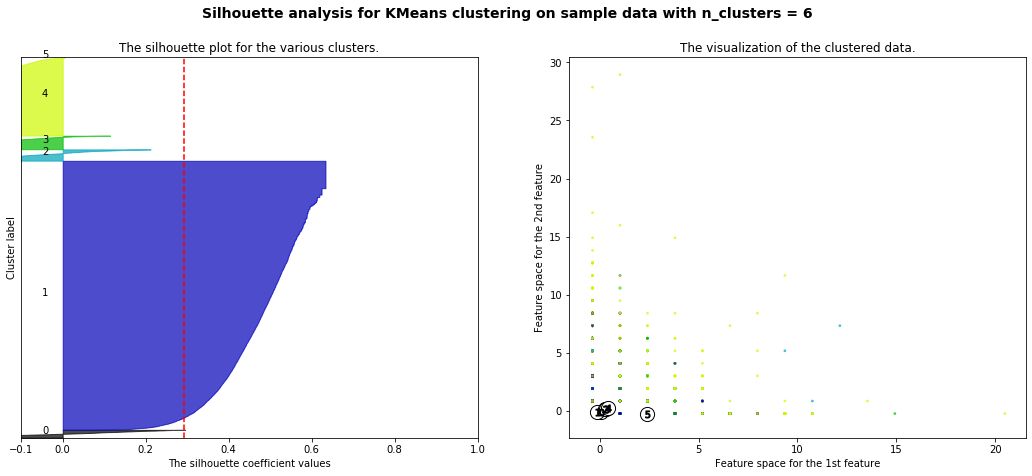

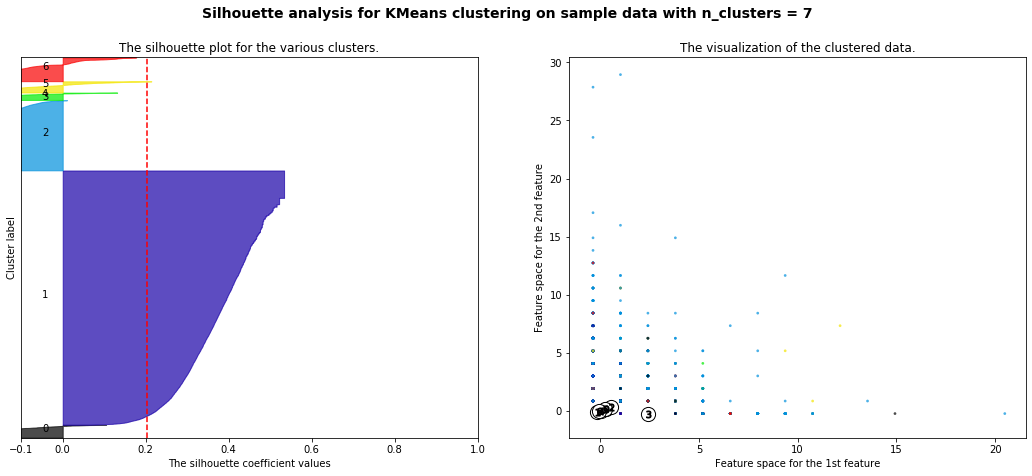

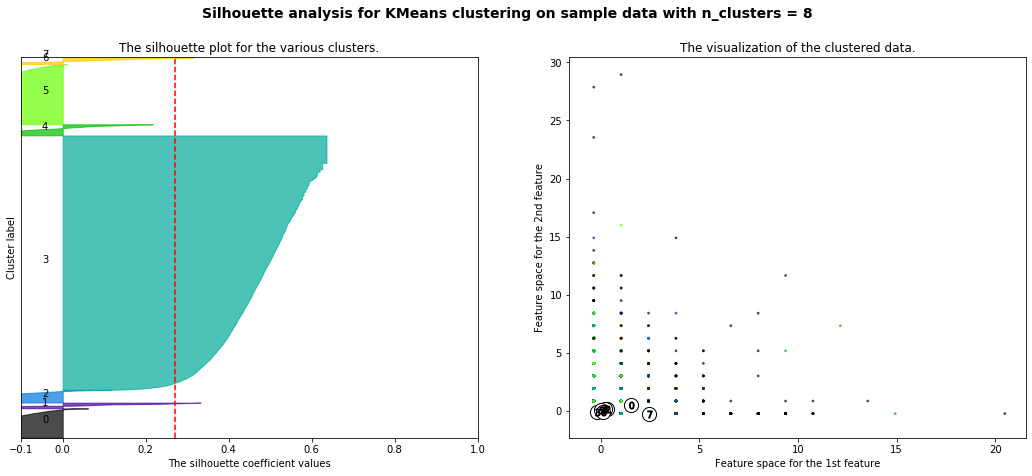

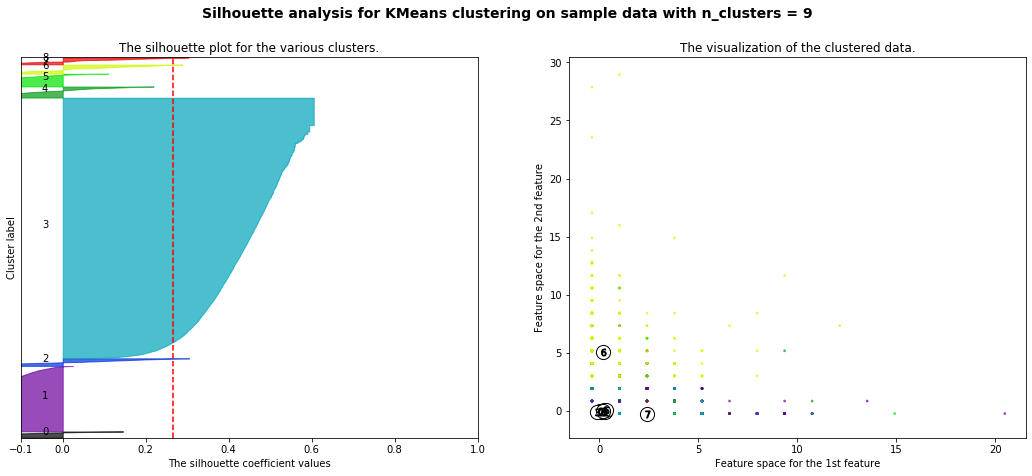

In [99]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



range_n_clusters = [2, 3, 4, 5, 6,7,8,9]
sil_score = dict()
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(features_scale) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(features_scale)
    sil_score[clusterer.labels_.max() +  1] = silhouette_score(features_scale,clusterer.labels_)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_scale, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_scale, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(features_scale[:, 0], features_scale[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()